# Test Glaze et al. model implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng

from bfdm.glazetask import sample_trials
from bfdm.glazemodel import get_optimal_params, sample_behavior, fit_glaze

In [2]:
rng = default_rng(999)

## Create synthetic data

In [3]:
n_trials = 2000
p_stay = 0.98
noise = 1.0

s, x = sample_trials(n_trials, p_stay, noise, rng)

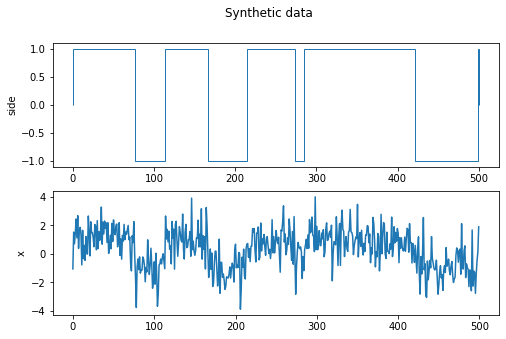

In [4]:
idx = np.s_[0:500]

(fig, ax) = plt.subplots(2, 1, figsize=(8, 5))

ax[0].stairs(s[idx])
ax[0].set_ylabel('side')

ax[1].plot(x[idx])
ax[1].set_ylabel('x')

fig.suptitle('Synthetic data');

## Run agent with optimal parameters on data

In [5]:
# Optimal values for bias and weight
params = get_optimal_params(p_stay, noise)

# Choice samples and filter result
y, flt = sample_behavior(x, params, rng)

# Compute error from predictions
err = (s - y) ** 2
win_size = 50
err_smooth = np.convolve(err, np.ones(win_size), 'same') / win_size

### Filter results

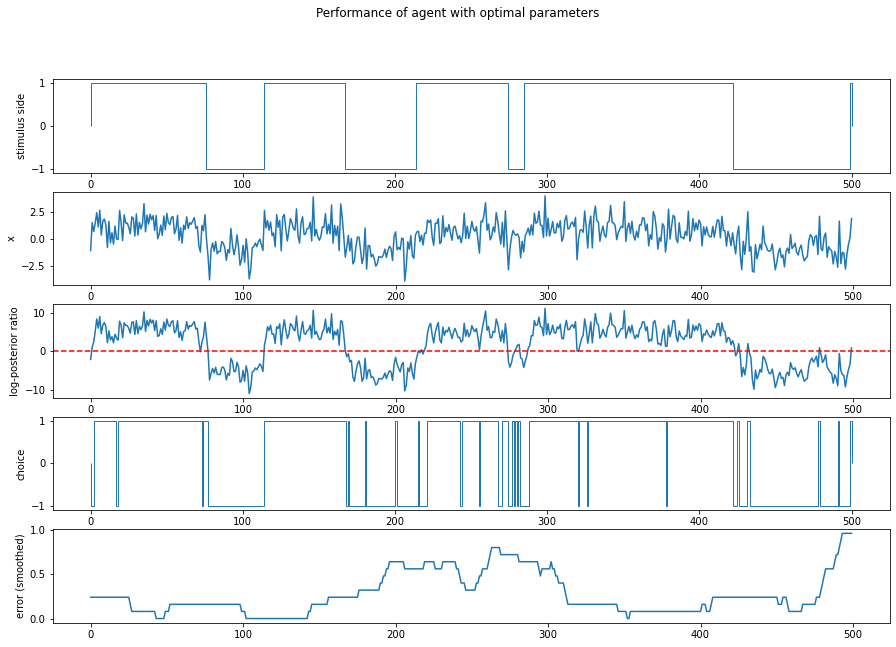

In [6]:
idx = np.s_[0:500]

(fig, ax) = plt.subplots(5, 1, figsize=(15, 10))

ax[0].stairs(s[idx])
ax[0].set_ylabel('stimulus side')

ax[1].plot(x[idx])
ax[1].set_ylabel('x')

ax[2].plot(flt.s_pos[idx])
ax[2].axhline(y=0, color='r', linestyle='--')
ax[2].set_ylabel('log-posterior ratio')

ax[3].stairs(y[idx])
ax[3].set_ylabel('choice')

ax[4].plot(err_smooth[idx])
ax[4].set_ylabel('error (smoothed)')

fig.suptitle('Performance of agent with optimal parameters');

## Recover model parameters from prediction data

In [11]:
# Fit model to preductions from optimal model
params_est = fit_glaze([x], [y])

In [12]:
# Print parameters of fit model
print(f'alpha: {params_est.alpha} (opt: {params.alpha})')
print(f'p_stay: {params_est.p_stay()} (opt: {params.p_stay()})')
print(f'w_0: {params_est.bias} (opt: {params.bias})')
print(f'w_1: {params_est.coef} (opt: {params.coef})')

alpha: 3.654962482608739 (opt: 3.8918202981106256)
p_stay: 0.9747895370284614 (opt: 0.98)
w_0: -0.1261449577557057 (opt: 0)
w_1: 1.8827934458022215 (opt: 2.0)
